<a href="https://colab.research.google.com/github/UQROO-MarianaJetzuvelyGarciaHau/Colab-Tareas/blob/main/Ejercicio_3_Validaci%C3%B3n_Cruzada_con_F1_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 3: Validación Cruzada con F1-score

https://github.com/UQROO-MarianaJetzuvelyGarciaHau/Colab-Tareas/blob/main/Ejercicio_3_Validaci%C3%B3n_Cruzada_con_F1_score.ipynb

Objetivo: Evaluar el rendimiento de un modelo Random Forest usando validación cruzada con F1-score.

Pasos:

1. Cargar un conjunto de datos.

2. Definir el modelo Random Forest.

3. Aplicar validación cruzada con 5 folds.

4. Calcular el F1-score promedio.

Código en Python:


F1-scores por fold: [0.93617021 0.95238095 0.98611111 0.97260274 0.9787234 ]
F1-score promedio: 0.9651976840478735


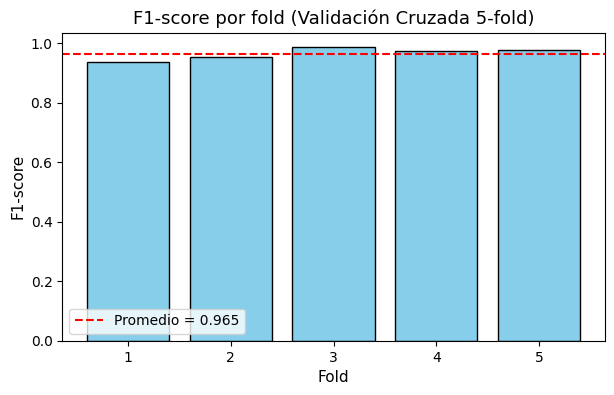


--- Comparación con distintos valores de cv ---
cv=3 → F1-score promedio: 0.967
cv=5 → F1-score promedio: 0.965
cv=10 → F1-score promedio: 0.971
cv=15 → F1-score promedio: 0.970


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
import matplotlib.pyplot as plt

# 2. Cargar el conjunto de datos
X, y = load_breast_cancer(return_X_y=True)

# 3. Definir el modelo Random Forest
model = RandomForestClassifier(random_state=42)

# 4. métrica de evaluación
f1 = make_scorer(f1_score)

# 5. Aplicar validación cruzada
scores = cross_val_score(model, X, y, cv=5, scoring=f1)

# 6. Mostrar resultados
print("F1-scores por fold:", scores)
print("F1-score promedio:", scores.mean())

# 7. Visualización gráfica de los F1-scores por fold
plt.figure(figsize=(7, 4))
plt.bar(range(1, 6), scores, color='skyblue', edgecolor='black')
plt.axhline(y=scores.mean(), color='red', linestyle='--', label=f'Promedio = {scores.mean():.3f}')
plt.title("F1-score por fold (Validación Cruzada 5-fold)", fontsize=13)
plt.xlabel("Fold", fontsize=11)
plt.ylabel("F1-score", fontsize=11)
plt.xticks(range(1, 6))
plt.legend()
plt.show()

# 8. probar con diferentes valores de 'cv'
print("\n--- Comparación con distintos valores de cv ---")
for cv in [3, 5, 10, 15]:
    scores_cv = cross_val_score(model, X, y, cv=cv, scoring=f1)
    print(f"cv={cv} → F1-score promedio: {scores_cv.mean():.3f}")

Preguntas de reflexión:

¿Qué tan consistente es el rendimiento del modelo entre los folds?

Podemos observar que el rendimiento del modelo es consistente. El F1-score presenta un promedio de 0.965, con valores individuales que se encuentran entre 0.936 y 0.986, muy cercanos al promedio. Esta baja variación indica que el modelo no es sensible a la forma en que se dividen los datos. Por lo tanto, se puede concluir que el modelo generaliza bien y no muestra indicios de sobreajuste en subconjuntos específicos del conjunto de datos.
Al variar el número de folds (en nuestro caso, 3, 5, 10 y 15), se pudo comprobar que el F1-score promedio se mantiene estable.

¿Por qué es importante usar validación cruzada?

Es importante porque permite evaluar el rendimiento del modelo de una manera más confiable y robusta. El conjunto de datos se divide en folds, y el modelo se entrena y evalúa múltiples veces, en lugar de hacerlo con una sola división entre entrenamiento y prueba. De esta forma, se reduce el sesgo de una sola partición y se obtiene una estimación del rendimiento más precisa y segura.

¿Qué otras métricas podrías evaluar además del F1-score?

Podemos usar otras métricas útiles para evaluar un modelo, como la Accuracy, que mide el porcentaje total de predicciones correctas. Precisión, que indica la proporción de verdaderos positivos entre todas las predicciones positivas. Recall, que mide la capacidad del modelo para detectar correctamente los casos positivos, siendo especialmente importante cuando los falsos negativos son críticos y la ROC AUC, que evalúa la capacidad del modelo para distinguir entre clases en diferentes umbrales de decisión.


Recomendaciones: Prueba con diferentes valores de 'cv' y compara los resultados.